
## 説明変数
1. 触媒の化学構造
2. 基質の化学構造

(配位子、活性金属中心、反応物の構造や反応中間体を想定して記述子を作成するなど)

## 目的変数
1. 収率(%)

## 評価
#### r2
精度の評価関数
0 ~ 100 %であり、1に近いほど良い。
「残差平方和÷全平方和」
#### MRE
平均二乗誤差（MSE：Mean Squared Error）
予測値と正解値の差であり0であるほど良い。
「予測値 - 実測値」
#### RMSE
MREの平方根

## RDkit
ケモインフォマティクス

#### モンガーフィンガープリント(Morgan Fingerprints)
#### 
RDKitフィンガープリント
MinHashフィンガープリント


## スケーリング
#### 標準化
平均を0、分散を1とするスケーリング手法
(x_i - μ_x) / σ_x
(x - 平均) / 標準偏差

○いつ使うか？
最大値及び最小値が決まっていない場合
外れ値が存在する場合

#### 正規化(min-max)
最小値を0、最大値を1とする0-1スケーリング手法
(x_i - x_min) / (x_max - x_min)

○いつ使うか？
最大値及び最小値が決まっている場合


＊ サンプル数50以上は欲しい。

In [1]:
import rdkit

In [3]:
import pandas as pd

In [4]:
table1 = pd.read_csv("2-table1.csv", header=0)

In [5]:
table1

,organocatalyst,time(h),yield(%)
0,ClC1=CC=C(C(O)=O)C(O)=C1,24,81
1,ClC1=CC=C(C(O)=O)C(O)=C1,12,14
2,OC1=CC(C)=CC=C1C(O)=O,24,74
3,OC1=CC(C)=CC=C1C(O)=O,12,15
4,OC1=CC(OC)=CC=C1C(O)=O,24,90
5,OC1=CC(OC)=CC=C1C(O)=O,12,81
6,OC1=CC(OC)=CC=C1C(O)=O,8,43
7,COC1=CC(OC)=C(C(O)=O)C(O)=C1,12,88
8,COC1=CC(OC)=C(C(O)=O)C(O)=C1,6,95
9,COC1=CC(OC)=C(C(O)=O)C(O)=C1,2,65


In [8]:
import numpy as np
from rdkit import Chem
from rdkit.Chem import AllChem

mols = [Chem.MolFromSmiles(smile) for smile in table1["organocatalyst"]]

fingerprints = []
safe = []
for mol_idx, mol in enumerate(mols):
    try:
        fingerprint = [x for x in Chem.AllChem.GetMorganFingerprintAsBitVect(mol,2,2048)]
        fingerprints.append(fingerprint)
    except e:
        print("Error", mol_idx)
        continue
fingerprints = np.array(fingerprints)
print(fingerprints)        

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [14]:
table1.iloc[:, :-1]

,organocatalyst,time(h)
0,ClC1=CC=C(C(O)=O)C(O)=C1,24
1,ClC1=CC=C(C(O)=O)C(O)=C1,12
2,OC1=CC(C)=CC=C1C(O)=O,24
3,OC1=CC(C)=CC=C1C(O)=O,12
4,OC1=CC(OC)=CC=C1C(O)=O,24
5,OC1=CC(OC)=CC=C1C(O)=O,12
6,OC1=CC(OC)=CC=C1C(O)=O,8
7,COC1=CC(OC)=C(C(O)=O)C(O)=C1,12
8,COC1=CC(OC)=C(C(O)=O)C(O)=C1,6
9,COC1=CC(OC)=C(C(O)=O)C(O)=C1,2


In [16]:
df_fp = pd.DataFrame(fingerprints)
df = pd.concat([table1.iloc[:,1], df_fp, table1.iloc[:,2]], axis=1)
X = df.iloc[:,:-1]
Y = df["yield(%)"]

print(X)
print(Y)

    time(h)  0  1  2  3  4  5  6  7  8  ...  2038  2039  2040  2041  2042  \
0        24  0  0  0  0  0  0  0  0  0  ...     0     0     0     0     0   
1        12  0  0  0  0  0  0  0  0  0  ...     0     0     0     0     0   
2        24  0  0  0  0  0  0  0  0  0  ...     0     0     0     0     0   
3        12  0  0  0  0  0  0  0  0  0  ...     0     0     0     0     0   
4        24  0  0  0  0  0  0  0  0  0  ...     0     0     0     0     0   
5        12  0  0  0  0  0  0  0  0  0  ...     0     0     0     0     0   
6         8  0  0  0  0  0  0  0  0  0  ...     0     0     0     0     0   
7        12  0  0  0  0  0  0  0  0  0  ...     0     0     0     0     0   
8         6  0  0  0  0  0  0  0  0  0  ...     0     0     0     0     0   
9         2  0  0  0  0  0  0  0  0  0  ...     0     0     0     0     0   
10        6  0  0  0  0  0  0  0  0  0  ...     0     0     0     0     0   
11        6  0  0  1  0  0  0  0  0  0  ...     0     0     0     0     0   

In [32]:
from sklearn.model_selection import train_test_split 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.2, random_state=0) 

/Users/watanabeyuitou/opt/anaconda3/envs/chem/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/watanabeyuitou/opt/anaconda3/envs/chem/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/watanabeyuitou/opt/anaconda3/envs/chem/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/watanabeyuitou/opt/anaconda3/envs/chem/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. 

R2= 0.7913599196976855
RMSE= 13.291968251541979
MAE= 11.916


/Users/watanabeyuitou/opt/anaconda3/envs/chem/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family

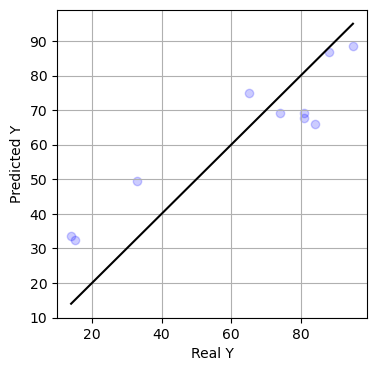

/Users/watanabeyuitou/opt/anaconda3/envs/chem/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/watanabeyuitou/opt/anaconda3/envs/chem/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/watanabeyuitou/opt/anaconda3/envs/chem/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/watanabeyuitou/opt/anaconda3/envs/chem/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. 

-----test-----
R2= -0.02693064857990657
RMSE= 23.202152199023836
MAE= 21.659999999999997


findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Fon

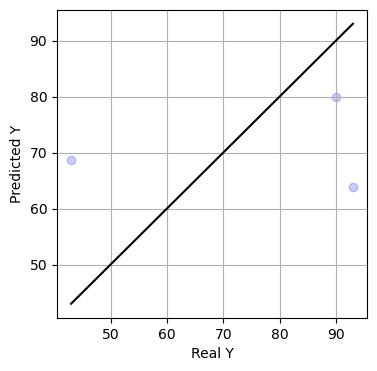

In [22]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train,Y_train)

from sklearn.metrics import r2_score
print("R2=", r2_score(Y_train, rf.predict(X_train)))

import numpy as np
from sklearn.metrics import mean_squared_error
print("RMSE=", np.sqrt(mean_squared_error(Y_train, rf.predict(X_train))))

from sklearn.metrics import mean_absolute_error
print("MAE=", mean_absolute_error(Y_train, rf.predict(X_train)))

%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(4,4))
plt.scatter(Y_train, rf.predict(X_train), alpha=0.2, c="blue")
plt.plot([Y_train.min(), Y_train.max()], [Y_train.min(), Y_train.max()], c="black")
plt.grid()
plt.xlabel("Real Y")
plt.ylabel("Predicted Y")
plt.show()

print('-----test-----')
print("R2=", r2_score(Y_test, rf.predict(X_test)))
print("RMSE=", np.sqrt(mean_squared_error(Y_test, rf.predict(X_test))))
print("MAE=", mean_absolute_error(Y_test, rf.predict(X_test)))
plt.figure(figsize=(4,4))
plt.scatter(Y_test, rf.predict(X_test), alpha=0.2, c="blue")
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], c="black")
plt.grid()
plt.xlabel("Real Y")
plt.ylabel("Predicted Y")
plt.show()

### train
- R2= 0.7913599196976855
- RMSE= 13.291968251541979
- MAE= 11.916

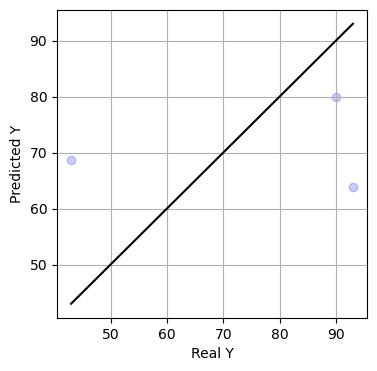

### test
- R2= -0.02693064857990657
- RMSE= 23.202152199023836
- MAE= 21.659999999999997

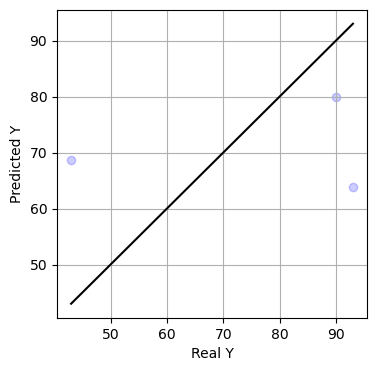

In [23]:
print(X_train.shape)
print(X_test.shape)

(10, 2049)
(3, 2049)


In [25]:
from dtreeviz.trees import dtreeviz
import seaborn as sns
import matplotlib.pyplot as plt

Text(0.5, 0, 'Importance')

findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Fon

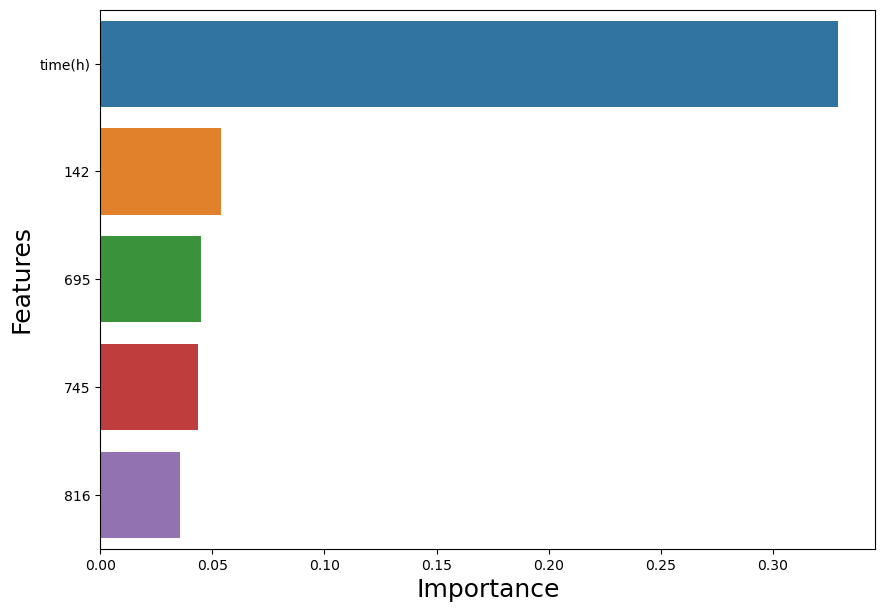

In [26]:
fea_rf_imp = pd.DataFrame({'imp': rf.feature_importances_, 'col': X_train.keys()})
fea_rf_imp = fea_rf_imp.sort_values(by='imp', ascending=False)[:5]

plt.figure(figsize=(10, 7))
sns.barplot(x='imp',y='col',data=fea_rf_imp,orient='h')
plt.ylabel('Features',fontsize=18)
plt.xlabel('Importance',fontsize=18)

findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.


R2= 0.4157953178516801
RMSE= 22.241954159722507
MAE= 19.523538095238095


findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Fon

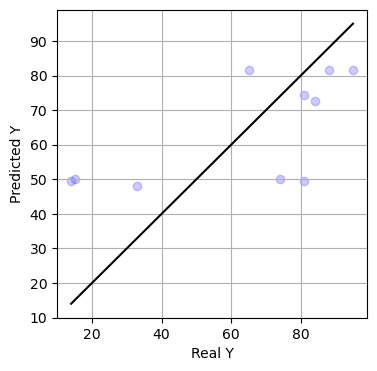

findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.


-----test-----
R2= -0.09083391839762567
RMSE= 23.913163336910856
MAE= 23.00255555555555


findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.


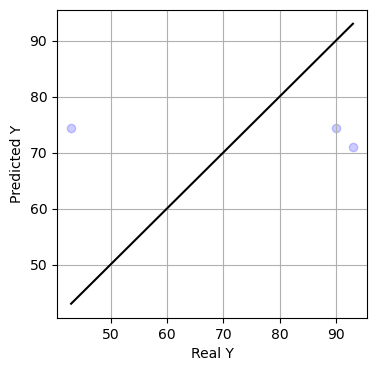

In [33]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
# timeを除外
X_train_2 = X_train.iloc[:,1:]
X_test_2 = X_test.iloc[:,1:]
rf.fit(X_train_2,Y_train)

from sklearn.metrics import r2_score
print("R2=", r2_score(Y_train, rf.predict(X_train_2)))

import numpy as np
from sklearn.metrics import mean_squared_error
print("RMSE=", np.sqrt(mean_squared_error(Y_train, rf.predict(X_train_2))))

from sklearn.metrics import mean_absolute_error
print("MAE=", mean_absolute_error(Y_train, rf.predict(X_train_2)))

%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(4,4))
plt.scatter(Y_train, rf.predict(X_train_2), alpha=0.2, c="blue")
plt.plot([Y_train.min(), Y_train.max()], [Y_train.min(), Y_train.max()], c="black")
plt.grid()
plt.xlabel("Real Y")
plt.ylabel("Predicted Y")
plt.show()

print('-----test-----')
print("R2=", r2_score(Y_test, rf.predict(X_test_2)))
print("RMSE=", np.sqrt(mean_squared_error(Y_test, rf.predict(X_test_2))))
print("MAE=", mean_absolute_error(Y_test, rf.predict(X_test_2)))
plt.figure(figsize=(4,4))
plt.scatter(Y_test, rf.predict(X_test_2), alpha=0.2, c="blue")
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], c="black")
plt.grid()
plt.xlabel("Real Y")
plt.ylabel("Predicted Y")
plt.show()

In [34]:
fea_rf_imp = pd.DataFrame({'imp': rf.feature_importances_, 'col': X_train_2.keys()})
fea_rf_imp.sort_values(by='imp', ascending=False)[:5]

,imp,col
1536,0.059813,1536
1013,0.050172,1013
235,0.048046,235
1683,0.043756,1683
561,0.039486,561
